In [10]:
import os
import json
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
megaplant_path = "./data_megaplantf.csv"  
blast_path = "./data_blast.csv"           
output_fig = "./species_accuracy_comparison.png"

In [4]:
# ======= LOAD & ALIGN =======
df_megaplant = pd.read_csv(megaplant_path)
df_blast = pd.read_csv(blast_path)

# Compute accuracy by species for both
species_acc_megaplant = (
    df_megaplant.groupby("species")
    .apply(lambda x: (x["true_label"] == x["prediction"]).mean())
    .reset_index(name="accuracy")
)
species_acc_megaplant["method"] = "MegaPlantTF"

species_acc_blast = (
    df_blast.groupby("species")
    .apply(lambda x: (x["true_label"] == x["prediction"]).mean())
    .reset_index(name="accuracy")
)
species_acc_blast["method"] = "BLAST"

# Merge both
species_acc = pd.concat([species_acc_megaplant, species_acc_blast], ignore_index=True)

# Sort by MegaPlantTF accuracy for consistent order
order = (
    species_acc_megaplant.sort_values("accuracy", ascending=False)["species"]
    .tolist()
)
species_acc["species"] = pd.Categorical(species_acc["species"], categories=order, ordered=True)


/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_33169/4292954522.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["true_label"] == x["prediction"]).mean())
/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_33169/4292954522.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["true_label"] == x["prediction"]).mean())


/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_33169/3616365002.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.99, 0.99])


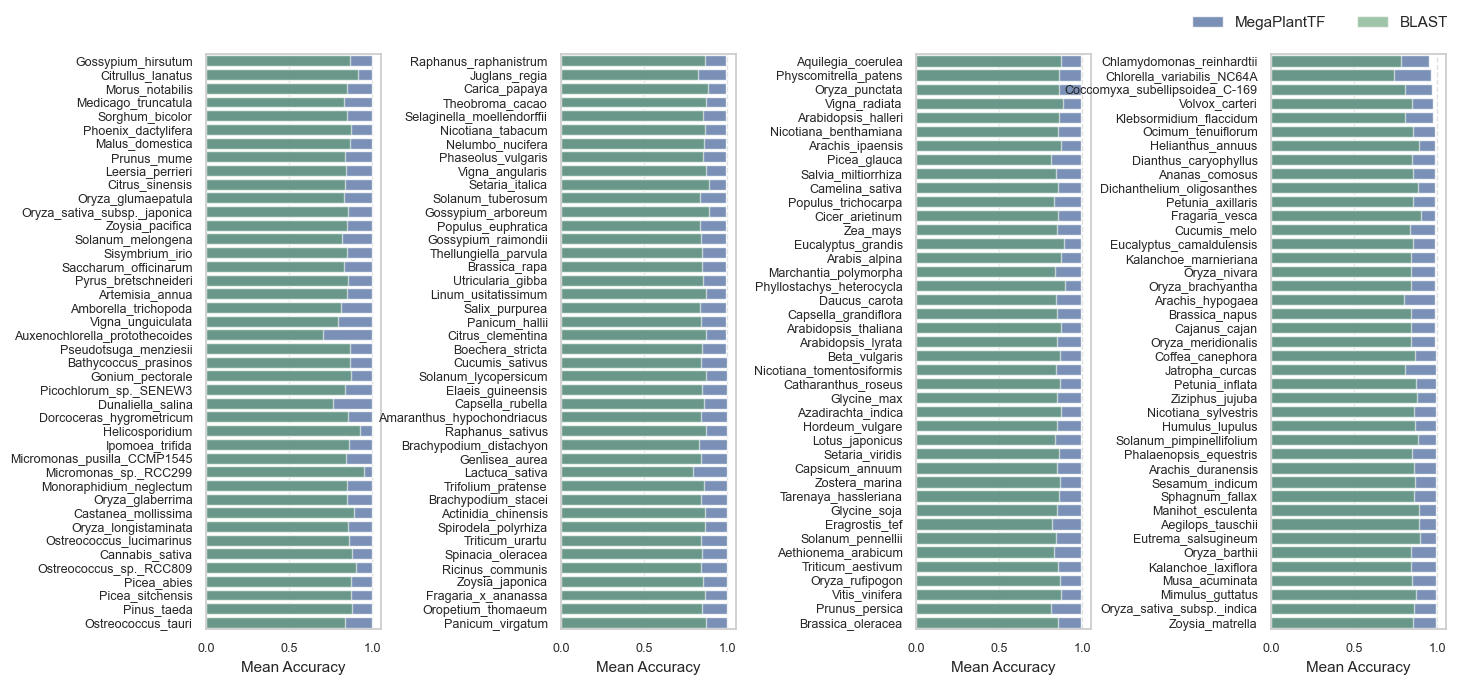

In [50]:
sns.set(style="whitegrid")

# Sort by MegaPlantTF accuracy for consistent order
order = (
    species_acc[species_acc["method"] == "MegaPlantTF"]
    .sort_values("accuracy", ascending=False)["species"]
    .tolist()
)
species_acc["species"] = species_acc["species"].astype(str)

# Choose number of horizontal panels (e.g., 3 or 4)
num_parts = 4

# Split species into roughly equal sequential chunks
chunks = np.array_split(order, num_parts)

# Create subplots horizontally
fig, axes = plt.subplots(1, num_parts, figsize=(16, n * 0.18 / num_parts), sharex=True, gridspec_kw={'wspace': 1.03})

# Ensure axes is iterable
if num_parts == 1:
    axes = [axes]

for idx, ax in enumerate(axes):
    subset_species = chunks[idx]
    subset = species_acc[species_acc["species"].isin(subset_species)].copy()

    # Reorder locally (top to bottom)
    subset["species"] = pd.Categorical(subset["species"], categories=subset_species[::-1], ordered=True)

    # MegaPlantTF (base layer)
    sns.barplot(
        data=subset[subset["method"] == "MegaPlantTF"],
        x="accuracy",
        y="species",
        color="#4C72B0",
        orient="h",
        alpha=0.8,
        ax=ax,
        label="MegaPlantTF"
    )

    # BLAST overlay
    sns.barplot(
        data=subset[subset["method"] == "BLAST"],
        x="accuracy",
        y="species",
        color="#55A868",
        orient="h",
        alpha=0.6,
        ax=ax,
        label="BLAST"
    )

    # Style
    ax.set_xlabel("Mean Accuracy", fontsize=11)
    ax.set_ylabel(None)
    ax.set_xlim(0, 1.05)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.tick_params(labelsize=9)

    # Remove titles entirely
    ax.set_title("")

    # Remove legends (we’ll add one shared legend)
    ax.get_legend().remove()

# Add single shared legend (top-right, inline)
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="",
    loc="upper right",
    frameon=False,
    fontsize=11,
    title_fontsize=12,
    ncol=2,
    bbox_to_anchor=(0.91, 0.95)
)

plt.tight_layout(rect=[0, 0, 0.99, 0.99])
plt.savefig(output_fig, dpi=600, bbox_inches="tight", transparent=False)
plt.show()

In [51]:
from sklearn.metrics import f1_score

# ======= LOAD & ALIGN =======
df_megaplant = pd.read_csv(megaplant_path)
df_blast = pd.read_csv(blast_path)

# --- Compute F1-score per species for MegaPlantTF ---
species_f1_megaplant = (
    df_megaplant.groupby("species")
    .apply(lambda x: f1_score(x["true_label"], x["prediction"], average="macro"))
    .reset_index(name="f1_score")
)
species_f1_megaplant["method"] = "MegaPlantTF"

# --- Compute F1-score per species for BLAST ---
species_f1_blast = (
    df_blast.groupby("species")
    .apply(lambda x: f1_score(x["true_label"], x["prediction"], average="macro"))
    .reset_index(name="f1_score")
)
species_f1_blast["method"] = "BLAST"

# Merge both into a single DataFrame
species_acc = pd.concat([species_f1_megaplant, species_f1_blast], ignore_index=True)

# Sort by MegaPlantTF F1-score for consistent ordering
order = (
    species_f1_megaplant.sort_values("f1_score", ascending=False)["species"]
    .tolist()
)
species_acc["species"] = pd.Categorical(species_acc["species"], categories=order, ordered=True)

/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_33169/1356820194.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: f1_score(x["true_label"], x["prediction"], average="macro"))
/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_33169/1356820194.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: f1_score(x["true_label"], x["prediction"], average="macro"))


/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_33169/2139771287.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.99, 0.99])


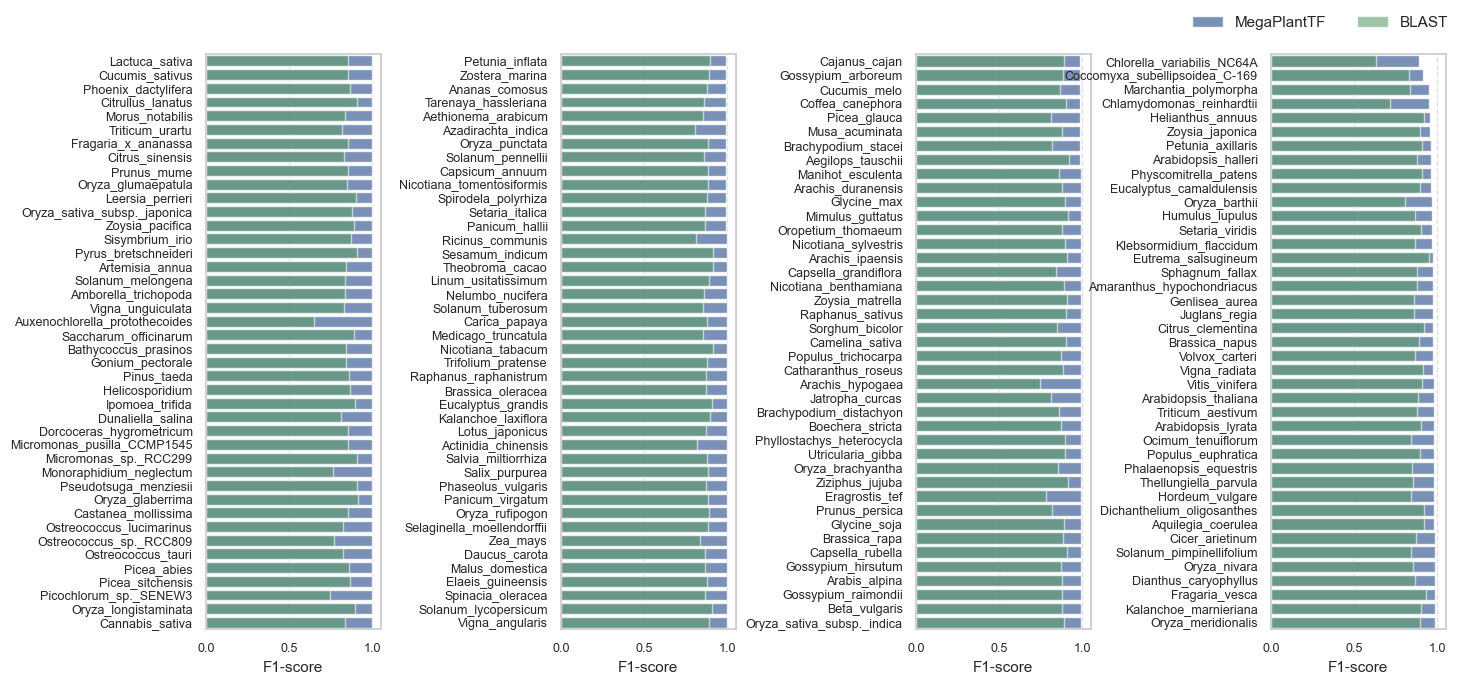

In [53]:
sns.set(style="whitegrid")

# Sort by MegaPlantTF F1-score for consistent order
order = (
    species_acc[species_acc["method"] == "MegaPlantTF"]
    .sort_values("f1_score", ascending=False)["species"]
    .tolist()
)
species_acc["species"] = species_acc["species"].astype(str)

# Choose number of horizontal panels (e.g., 3 or 4)
num_parts = 4

# Split species into roughly equal sequential chunks
chunks = np.array_split(order, num_parts)

# Create subplots horizontally
fig, axes = plt.subplots(
    1,
    num_parts,
    figsize=(16, n * 0.18 / num_parts),
    sharex=True,
    gridspec_kw={'wspace': 1.03}
)

# Ensure axes is iterable
if num_parts == 1:
    axes = [axes]

for idx, ax in enumerate(axes):
    subset_species = chunks[idx]
    subset = species_acc[species_acc["species"].isin(subset_species)].copy()

    # Reorder locally (top to bottom)
    subset["species"] = pd.Categorical(subset["species"], categories=subset_species[::-1], ordered=True)

    # MegaPlantTF (base layer)
    sns.barplot(
        data=subset[subset["method"] == "MegaPlantTF"],
        x="f1_score",
        y="species",
        color="#4C72B0",
        orient="h",
        alpha=0.8,
        ax=ax,
        label="MegaPlantTF"
    )

    # BLAST overlay
    sns.barplot(
        data=subset[subset["method"] == "BLAST"],
        x="f1_score",
        y="species",
        color="#55A868",
        orient="h",
        alpha=0.6,
        ax=ax,
        label="BLAST"
    )

    # Style
    ax.set_xlabel("F1-score", fontsize=11)
    ax.set_ylabel(None)
    ax.set_xlim(0, 1.05)
    ax.grid(axis="x", linestyle="--", alpha=0.6)
    ax.tick_params(labelsize=9)
    ax.set_title("")  # no titles
    ax.get_legend().remove()  # shared legend only

# --- Shared legend (top-right, inline) ---
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="",
    loc="upper right",
    frameon=False,
    fontsize=11,
    title_fontsize=12,
    ncol=2,
    bbox_to_anchor=(0.91, 0.95)
)

plt.tight_layout(rect=[0, 0, 0.99, 0.99])
plt.savefig(output_fig, dpi=600, bbox_inches="tight", transparent=False)
plt.show()